[View in Colaboratory](https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/nlp/2-lstm.ipynb)

In [1]:
# Based on
# https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [3]:
# https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

# each review is encoded as a sequence of word indexes
# indexed by overall frequency in the dataset
# output is 0 (negative) or 1 (positive) 
imdb = tf.keras.datasets.imdb.load_data(num_words=max_features)
(raw_input_train, y_train), (raw_input_test, y_test) = imdb

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

input_train = tf.keras.preprocessing.sequence.pad_sequences(raw_input_train, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(raw_input_test, maxlen=maxlen)

## GRU RNNs

In [11]:
from tensorflow.keras.layers import GRU, Embedding, Bidirectional

embedding_dim = 32

model = keras.Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))

model.add(GRU(units=32))

# binary classifier
model.add(tf.keras.layers.Dense(name='fc', units=32, activation='relu'))
model.add(tf.keras.layers.Dense(name='classifier', units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
fc (Dense)                   (None, 32)                1056      
_________________________________________________________________
classifier (Dense)           (None, 1)                 33        
Total params: 327,329
Trainable params: 327,329
Non-trainable params: 0
_________________________________________________________________


In [5]:
batch_size = 1000

%time history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.6936 - acc: 0.5054 - val_loss: 0.6927 - val_acc: 0.5114
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6898 - acc: 0.5465 - val_loss: 0.6895 - val_acc: 0.5600
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6838 - acc: 0.5763 - val_loss: 0.6821 - val_acc: 0.5818
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6662 - acc: 0.6260 - val_loss: 0.6553 - val_acc: 0.6288
Epoch 5/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.5882 - acc: 0.6984 - val_loss: 0.5339 - val_acc: 0.7404
Epoch 6/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.4680 - acc: 0.7814 - val_loss: 0.4744 - val_acc: 0.7790
Epoch 7/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3905 - acc: 0.8300 - val_loss: 0.4482 - val_acc:

In [6]:
train_loss, train_accuracy = model.evaluate(input_train, y_train, batch_size=batch_size)
train_accuracy

25000/25000 [==============================] - 12s 472us/step


0.9065600013732911

In [7]:
test_loss, test_accuracy = model.evaluate(input_test, y_test, batch_size=batch_size)
test_accuracy

25000/25000 [==============================] - 12s 473us/step


0.8569200038909912

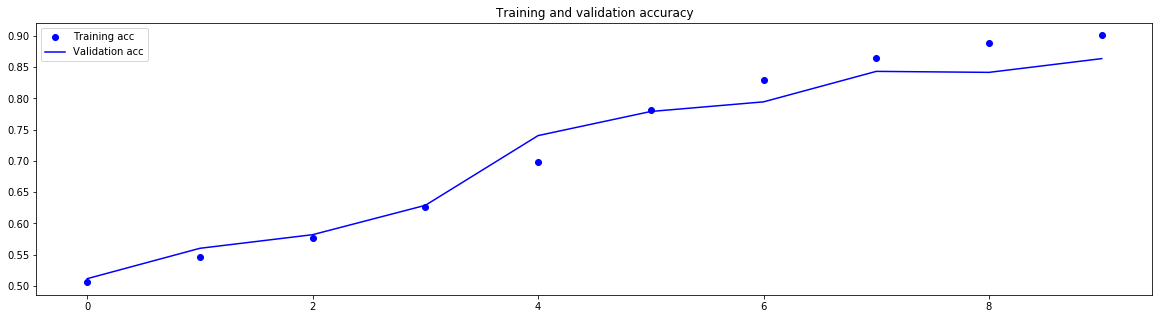

In [8]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'bo', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

In [9]:
# precition
model.predict(input_test[0:5])

array([[0.37747672],
       [0.9867359 ],
       [0.04856211],
       [0.7904883 ],
       [0.9863673 ]], dtype=float32)

In [10]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1], dtype=int64)